# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [ ]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [ ]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [ ]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

3

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( Dense( 1 , input_shape = (nfeatures ,), activation= 'sigmoid') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 1s 38ms/step - loss: 0.7095 - val_loss: 0.6840
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6798 - val_loss: 0.6608
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6627 - val_loss: 0.6433
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6474 - val_loss: 0.6297
Epoch 5/50
16/16 [==============================] - 0s 11ms/step - loss: 0.6347 - val_loss: 0.6168
Epoch 6/50
16/16 [==============================] - 0s 16ms/step - loss: 0.6226 - val_loss: 0.6052
Epoch 7/50
16/16 [==============================] - 0s 14ms/step - loss: 0.6114 - val_loss: 0.5946
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6013 - val_loss: 0.5842
Epoch 9/50
16/16 [==============================] - 0s 16ms/step - loss: 0.5912 - val_loss: 0.5756
Epoch 10/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5828 - val_loss: 0.5678
Epoch 11/50
1

* 학습결과 그래프

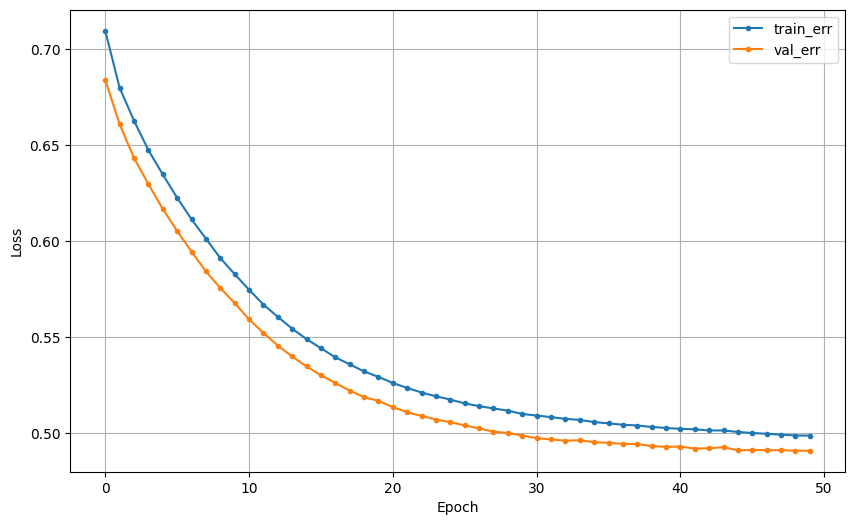

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       170
           1       0.73      0.68      0.71        98

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [ ]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [ ]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model2 =  Sequential( Dense(1 ,input_shape = (nfeatures,), activation = 'sigmoid'))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model2.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')
history = model2.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 2s 35ms/step - loss: 0.6460 - val_loss: 0.6237
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6198 - val_loss: 0.5994
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5991 - val_loss: 0.5805
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5814 - val_loss: 0.5639
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5662 - val_loss: 0.5491
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5531 - val_loss: 0.5371
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5426 - val_loss: 0.5268
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5318 - val_loss: 0.5170
Epoch 9/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5234 - val_loss: 0.5092
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5164 - val_loss: 0.5028
Epoch 11/50
16/16 

* 학습결과 그래프

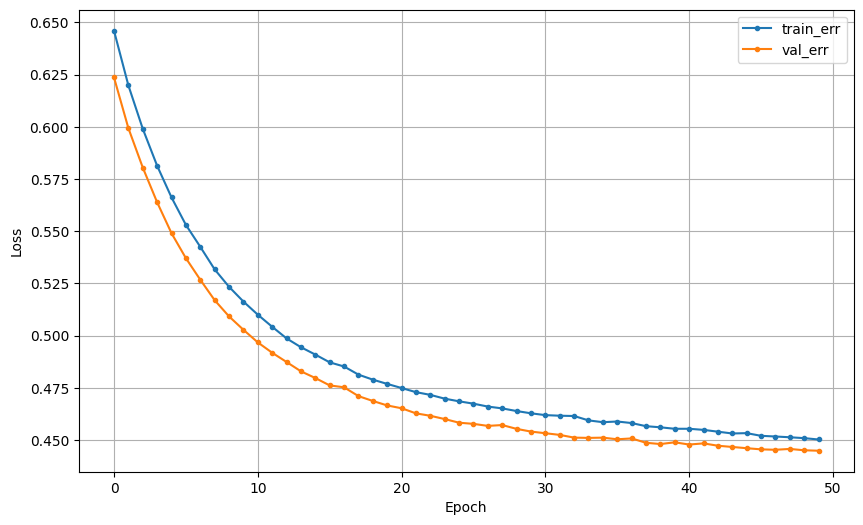

In [ ]:
dl_history_plot(history)

* 예측 및 검증

In [ ]:
pred2 = model2.predict(x_val)
pred2 = np.where(pred2 >= .5, 1, 0)

print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       170
           1       0.68      0.65      0.67        98

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [ ]:
n = x_train.shape[1]
n

8

In [ ]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([ Dense( 4, input_shape = (n ,), activation = 'relu'),
                      Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 [==============================] - 2s 35ms/step - loss: 0.5883 - val_loss: 0.5487
Epoch 2/50
16/16 [==============================] - 0s 20ms/step - loss: 0.5619 - val_loss: 0.5272
Epoch 3/50
16/16 [==============================] - 0s 13ms/step - loss: 0.5405 - val_loss: 0.5099
Epoch 4/50
16/16 [==============================] - 0s 12ms/step - loss: 0.5192 - val_loss: 0.4948
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5003 - val_loss: 0.4812
Epoch 6/50
16/16 [==============================] - 0s 12ms/step - loss: 0.4871 - val_loss: 0.4690
Epoch 7/50
16/16 [==============================] - 0s 14ms/step - loss: 0.4743 - val_loss: 0.4606
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 0.4634 - val_loss: 0.4521
Epoch 9/50
16/16 [==============================] - 0s 11ms/step - loss: 0.4553 - val_loss: 0.4451
Epoch 10/50
16/16 [==============================] - 0s 11ms/step - loss: 0.4490 - val_loss: 0.4427
Epoch 11/5

* 학습결과 그래프

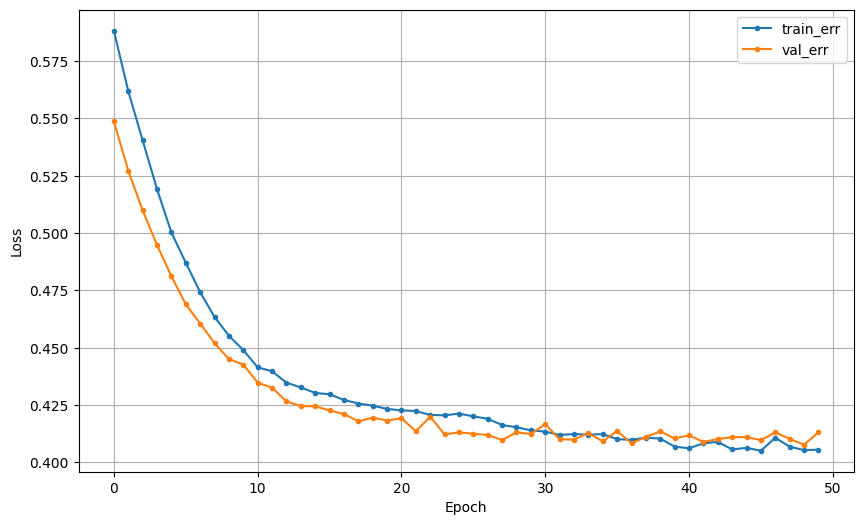

In [ ]:
dl_history_plot(hist)

* 예측 및 검증

In [ ]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       170
           1       0.77      0.62      0.69        98

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

8

In [ ]:
#메모리 초기화
clear_session()

#모델
model4 = Sequential([Dense(16,input_shape = (nfeatures,), activation='relu'),
                   Dense(1,activation='sigmoid')])

#모델 요약
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')
history = model4.fit(x_train, y_train, epochs = 50, validation_split = 0.2).history

Epoch 1/50
16/16 [==============================] - 2s 25ms/step - loss: 0.6405 - val_loss: 0.5645
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5577 - val_loss: 0.5238
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5130 - val_loss: 0.4805
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4769 - val_loss: 0.4605
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4627 - val_loss: 0.4515
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4527 - val_loss: 0.4411
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4430 - val_loss: 0.4398
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4376 - val_loss: 0.4290
Epoch 9/50
16/16 [==============================] - 0s 10ms/step - loss: 0.4339 - val_loss: 0.4227
Epoch 10/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4319 - val_loss: 0.4214
Epoch 11/50
16/16

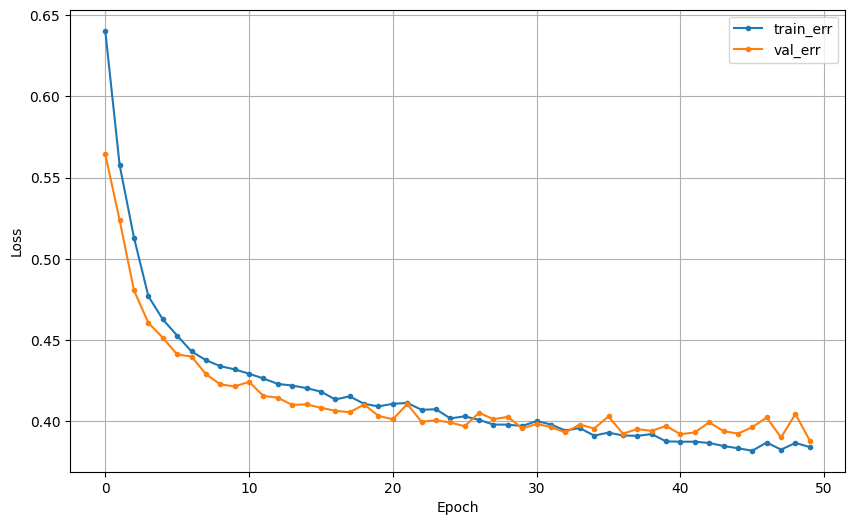

In [ ]:
dl_history_plot(history)

In [ ]:
pred4 = model4.predict(x_val)
pred4 = np.where(pred4 >= 0.5, 1, 0)
print(classification_report(y_val, pred4))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       170
           1       0.78      0.59      0.67        98

    accuracy                           0.79       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

8

In [ ]:
#메모리 정리
clear_session()

#모델
model5 = Sequential([Dense(16, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')]
                   )

#모델 요약
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')
history = model5.fit(x_train, y_train, epochs = 50, validation_split = 0.2).history

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 0.6772 - val_loss: 0.6540
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6087 - val_loss: 0.5398
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5011 - val_loss: 0.4548
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4526 - val_loss: 0.4480
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4436 - val_loss: 0.4325
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4381 - val_loss: 0.4294
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4362 - val_loss: 0.4256
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4339 - val_loss: 0.4210
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4283 - val_loss: 0.4159
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4243 - val_loss: 0.4180
Epoch 11/50
16/16 

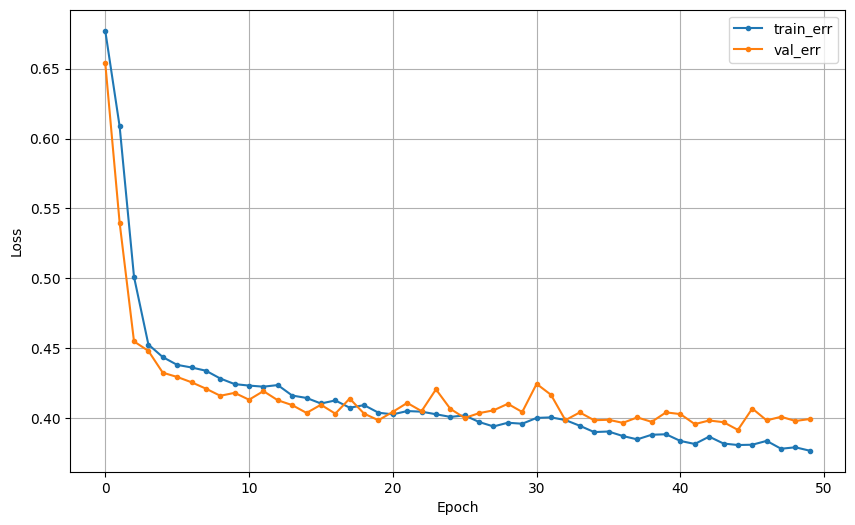

In [ ]:
dl_history_plot(history)

In [ ]:
pred5 = model5.predict(x_val)
pred5 = np.where(pred5 >= 0.5, 1,0)
print(classification_report(y_val,pred5))

9/9 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       170
           1       0.77      0.63      0.69        98

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [ ]:
nfeatures = x_train.shape[1]
nfeatures

8

In [ ]:
#메모리 정리
clear_session()

#모델
model6 = Sequential([Dense(4, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(2, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')]
                   )

#모델 요약
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model6.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')
history = model6.fit(x_train, y_train, epochs = 50, validation_split = 0.2).history

Epoch 1/50
16/16 [==============================] - 3s 84ms/step - loss: 0.6029 - val_loss: 0.5889
Epoch 2/50
16/16 [==============================] - 0s 12ms/step - loss: 0.5825 - val_loss: 0.5720
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 0.5683 - val_loss: 0.5585
Epoch 4/50
16/16 [==============================] - 0s 14ms/step - loss: 0.5541 - val_loss: 0.5391
Epoch 5/50
16/16 [==============================] - 0s 14ms/step - loss: 0.5339 - val_loss: 0.5186
Epoch 6/50
16/16 [==============================] - 0s 14ms/step - loss: 0.5144 - val_loss: 0.5020
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5005 - val_loss: 0.4868
Epoch 8/50
16/16 [==============================] - 0s 15ms/step - loss: 0.4864 - val_loss: 0.4773
Epoch 9/50
16/16 [==============================] - 0s 17ms/step - loss: 0.4789 - val_loss: 0.4653
Epoch 10/50
16/16 [==============================] - 0s 10ms/step - loss: 0.4675 - val_loss: 0.4586
Epoch 11/

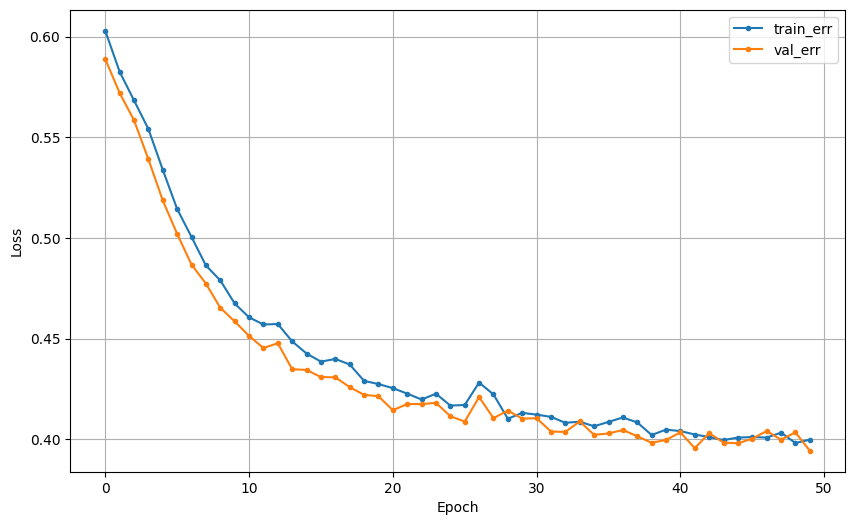

In [ ]:
dl_history_plot(history)

In [ ]:
pred6 = model6.predict(x_val)
pred6 = np.where(pred6 >= 0.5, 1,0)
print(classification_report(y_val,pred6))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       170
           1       0.78      0.62      0.69        98

    accuracy                           0.80       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.80      0.80      0.79       268

